# Dossier Klimawandel

Publiziert am 9. August 2019 auf [Republik.ch](https://www.republik.ch/dossier/klimawandel)

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 5]
pd.options.display.max_columns = None

DATASETS = './datasets'
OUT = './out'
def dataset(fname):
    return os.path.join(DATASETS, fname)
def out(fname):
    return os.path.join(OUT, fname)

def format_csv(df, skip_index=False):
    'Reformats data for display in chart'
    rows = []
    for index, row in df.iterrows():
        for key, val in row.iteritems():
            if skip_index:
                rows.append([key,val])
            else:
                rows.append([index,key,val])

    return rows

## Globale Situation

### Jährlicher CO₂-Ausstoss nach Regionen

Millionen Tonnen CO₂ pro Jahr

Quelle: [Global Carbon Project](https://www.globalcarbonproject.org)

Die Daten können nicht direkt heruntergeladen werden, sondern müssen im Global Carbon Atlas exportiert werden:

 1. [Atlas öffnen](http://www.globalcarbonatlas.org/en/CO2-emissions)
 1. In der Toolbar rechts wählen: Time Series
 1. Im Menü links auswählen:
    1. Type: Fossil Fuels, Territorial
    1. Units: MtCO₂
    1. All: Select World, China, United States of America
    1. Groups: EU28
 1. In der Toolbar unten rechts «Download» auswählen und die Daten der Zeitperiode 1960–2017 als CSV exportieren.

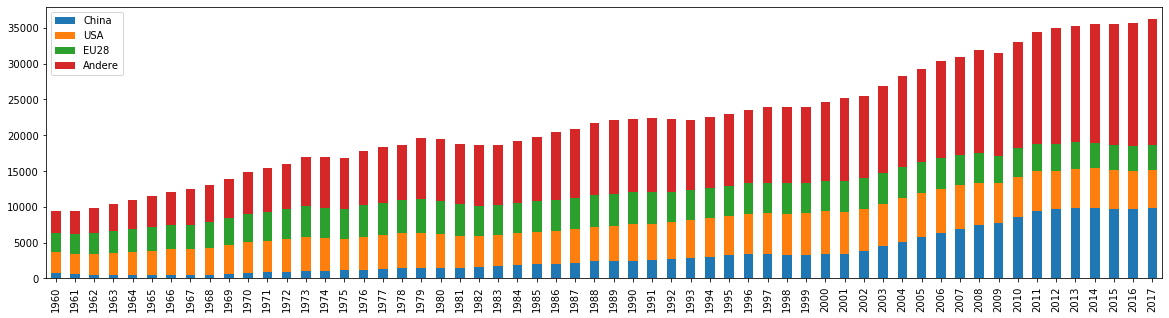

In [42]:
emissions = pd.read_csv(dataset('export_20190807_1428.csv'), sep=';', skiprows=1, skipfooter=2, engine='python', index_col=0)
emissions_selected = emissions[['China', 'United States of America', 'EU28']].copy()
emissions_selected.loc[:,'Andere'] = emissions['World'] - emissions_selected.sum(axis=1)
emissions_selected = emissions_selected.rename(columns={'United States of America': 'USA'})
emissions_selected.plot(kind='bar', stacked=True);

emissions_selected /= 1000

In [43]:
west = emissions_selected[['USA', 'EU28']].sum().sum()
rest = emissions_selected[['China', 'Andere']].sum().sum()
total = rest + west
print("West:", west / total * 100)
print("Rest:", rest / total * 100)

West: 40.38624923773286
Rest: 59.613750762267124


In [44]:
emissions_display = pd.DataFrame(format_csv(emissions_selected), columns=['year','label','value'])
emissions_display.to_csv(out('emissions_global.csv'), float_format='%.4f', index=False)

### Globaler Temperaturanstieg

Abweichung vom langjährigen Durchschnitt 1951–1980

Quelle: NASA ([Website](https://climate.nasa.gov/vital-signs/global-temperature/), [Rohdaten](https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt))

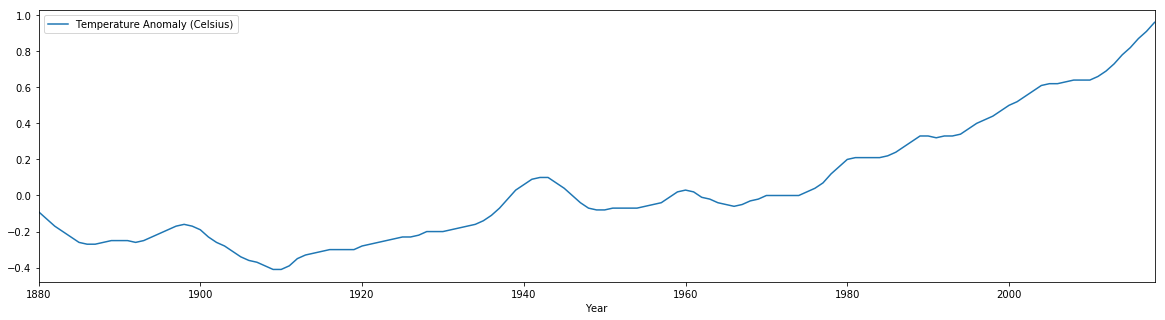

In [7]:
warming = pd.read_csv(dataset('Global_Mean_Estimates_based_on_Land_and_Ocean_Data.txt'), skiprows=[0,1,2,4], sep='\s+')
warming.rename(columns={"Lowess(5)": "Temperature Anomaly (Celsius)"}, inplace=True)
warming_display = pd.DataFrame(warming[['Year', 'Temperature Anomaly (Celsius)']].values, columns=['year', 'value'])
warming_display['year'] = warming_display['year'].astype('int32')
warming.plot(kind='line', x='Year', y='Temperature Anomaly (Celsius)');

In [8]:
warming_display.to_csv(out('warming.csv'), index=False)

## Schweiz

### CO₂-Ausstoss pro Einwohner in der Schweiz und den Nachbarländern

Tonnen CO₂ pro Einwohner pro Jahr

Die Daten können nicht direkt heruntergeladen werden, sondern müssen im Global Carbon Atlas exportiert werden (siehe oben).

Quelle: [Carbon Atlas](http://www.globalcarbonatlas.org/en/CO2-emissions)

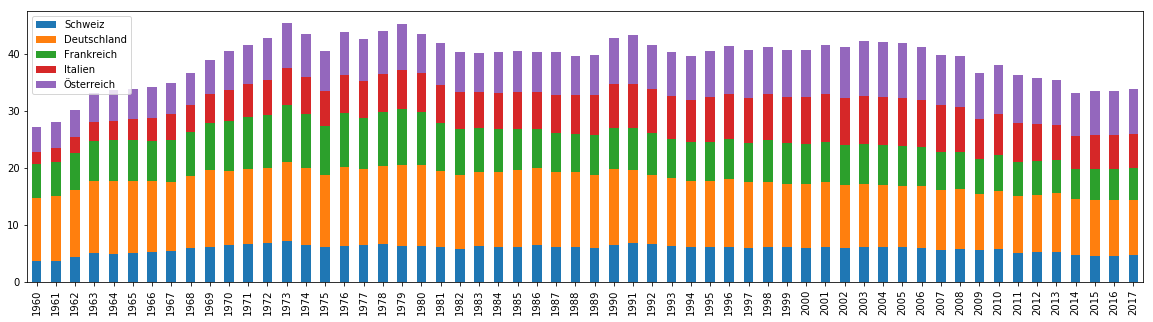

In [10]:
tco2_per_capita = pd.read_csv(dataset('tco2_per_capita_export_20190625_1220.csv'), sep=';', skiprows=1, skipfooter=3, engine='python', index_col=0)
tco2_per_capita_ch = tco2_per_capita[['Switzerland', 'Germany', 'France', 'Italy', 'Austria']].copy()
tco2_per_capita_ch.rename(columns={'Switzerland': 'Schweiz', 'Germany': 'Deutschland', 'Italy': 'Italien', 'Austria': 'Österreich', 'France': 'Frankreich'}, inplace=True)
tco2_per_capita_ch_selected = tco2_per_capita_ch.loc[:]
tco2_per_capita_ch_selected.plot(kind='bar', stacked=True);

In [11]:
tco2_per_capita_ch_display = pd.DataFrame(format_csv(tco2_per_capita_ch_selected), columns=['year','label','value'])
tco2_per_capita_ch_display.to_csv(out('emissions_ch.csv'), float_format='%.4f', index=False)

### Emissionen von Treibausgasen im Inland nach Sektoren

Millionen Tonnen CO2-Äquivalente

Quelle: Treibhausgasinventar des Bafu ([Website](https://www.bafu.admin.ch/bafu/de/home/themen/klima/daten-indikatoren-karten/daten/treibhausgasinventar.html), [Rohdaten](https://www.bafu.admin.ch/dam/bafu/de/dokumente/klima/fachinfo-daten/CO2_Statistik_Daten.xlsx.download.xlsx/CO2-Statistik-2019-07_D.xlsx))

In [33]:
ghg_ch = pd.read_excel(dataset('CO2-Statistik-2019-07_D.xlsx'), sheet_name='Alle THG nach Sektoren', skiprows=[0,1,3], index_col=0)
ghg_ch = ghg_ch.dropna()

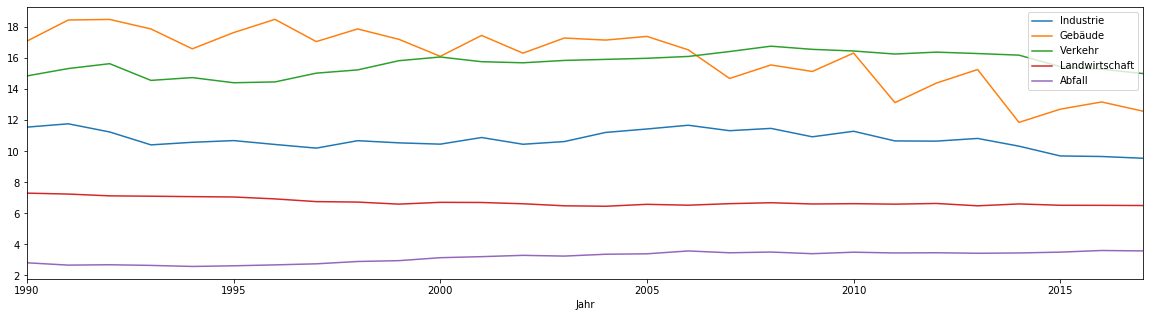

In [34]:
ghg_ch_totals = ghg_ch.iloc[:,[0,3,6,7,8]].rename(columns={'Total': 'Industrie', 'Total.1': 'Gebäude', 'Total.2': 'Verkehr', 'Total.3': 'Landwirtschaft', 'Total.4': 'Abfall'})
ghg_ch_totals.plot(kind='line');

In [35]:
ghg_ch_display = pd.DataFrame(format_csv(ghg_ch_totals), columns=['year','sector','value'])
ghg_ch_display.to_csv(out('ghg_ch_display.csv'), float_format='%.2f', index=False)

### Treibhausgas-Emissionen durch inländischen Konsum

Millionen Tonnen CO2-Äquivalente

Quelle [Bafu](https://www.bafu.admin.ch/bafu/de/home/themen/klima/inkuerze/_jcr_content/par/accordion_2013069894/items/indikator_konsumbedi/accordionpar/externalcontent.external.exturl.xlsx/aHR0cHM6Ly93d3cuaW5kaWthdG9yZW4uYWRtaW4uY2gvUHVibG/ljL0V4cG9ydD9jaGFydENvbmZpZ3VyYXRpb25JZD0xMzE1MA==/.xlsx)

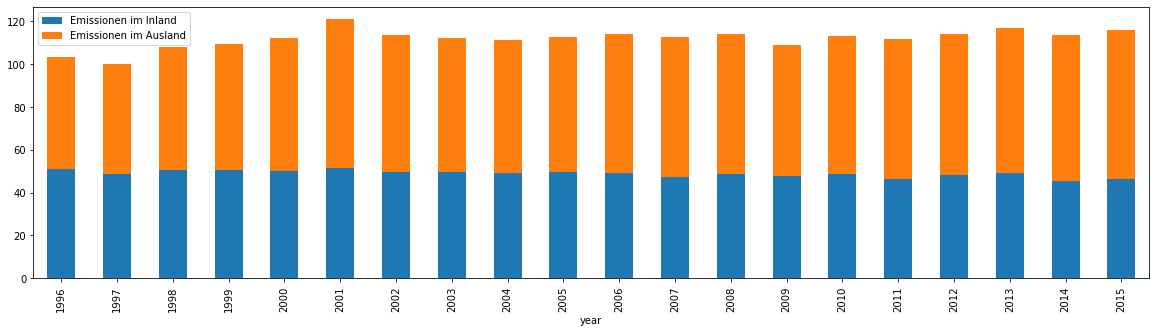

In [36]:
footprint_ch = pd.read_excel(dataset('GW016_Treibhausgas-Fussabdruck_20190721_BAFUIndikatorDatenblatt2.xlsx'), sheet_name='DE', skiprows=7)
footprint_ch = footprint_ch.rename(columns={'Jahr': 'year', footprint_ch.columns[1]: 'Emissionen im Inland', footprint_ch.columns[2]: 'Emissionen im Ausland'})
footprint_ch = footprint_ch.set_index('year')
footprint_ch.plot(kind='bar', stacked=True);

In [37]:
footprint_ch_display = pd.DataFrame(format_csv(footprint_ch), columns=['year','origin','value'])
footprint_ch_display.to_csv(out('footprint_ch_display.csv'), float_format='%.2f', index=False)